# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:
[ML0919, Задание 2] Фамилия Имя.<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, переводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

# ***Ваше решение здесь***
$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - \langle\,x_i,w\rangle) ^ 2 \right] + \frac{1}{C}\sum_{j=1}^{D}w_j^2 $$

$$ w_{new} = w_{old} - \alpha\nabla_w{L^{*}(w_{old})} $$

$$ \forall j_1, ..., j_n  $$

$$ w_{new} = w_{old} - \alpha(-\frac{2}{n}\sum_{i=1}^{n}x_{j_i}^{T}(y_{j_i} - \langle\,x_{j_i}w\rangle) + \frac{2}{C}w_{old})$$

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, который получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2 $$

$$ a(x_i) = \frac{1}{1 + \exp(-\langle\,x_i,w\rangle)} $$

$$ w_{new} = w_{old} - \alpha\nabla_w{L^{*}(w_{old})} $$

$$ L^{*}(w) = \frac{1}{n}\left[\sum_i y_i \log (1 + \exp(-\langle\,x_i,w\rangle)) + ( 1 - y_i) \log  (1 + \exp(\langle\,x_i,w\rangle))\right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2 $$

$$ \nabla_w{L^{*}(w)}=\frac{1}{n}\left[\sum_j \frac{-x_j^{T}y_j\exp(-\langle\,x_j,w\rangle)}{1+\exp(-\langle\,x_j,w\rangle)}+\frac{x_j^{T}(1-y_j)\exp(\langle\,x_j,w\rangle)}{1+\exp(\langle\,x_j,w\rangle)}\right] +\frac{2}{C}w_{old} $$

$$ \frac{\exp(-\langle\,x_j,w\rangle)}{1+\exp(-\langle\,x_j,w\rangle)}=1-\sigma(w,x_j) $$

$$ \frac{\exp(\langle\,x_j,w\rangle)}{1+\exp(\langle\,x_j,w\rangle)}=\sigma(w,x_j) $$

$$ \forall j_1, ..., j_n $$

$$ w_{new} = w_{old} - \alpha\left[\frac{1}{n}(\sum_j x_j^{T}(\sigma(w,x_j)-y_j))+\frac{2}{C}w_{old}\right] $$

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Из теории матрично-векторного дифференцирования http://www.machinelearning.ru/wiki/images/5/50/MOMO17_Seminar2.pdf

Гессиан $ \nabla^2(Q(w)) = det(XX^{T}) > 0 $ 
(т.к. $X$ имеет полный ранг)

Точное решение для модели с $L2$ регуляризацией:

$$ Q(w) = (Xw-y)^{T}(Xw-y)+\lambda w^{T}w $$

$$ \nabla_w Q(w) = 2XX^{T}w-2X^{T}y+2\lambda Iw = 0 $$

$$ (XX^{T} + \lambda I)w = X^{T}y $$

$$ w = (XX^{T} + \lambda I)^{-1}X^{T}y $$

Возможно, можно подобрать такое $ \lambda $, чтобы матрица $ XX^{T} + \lambda I $ имела обратную.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***

Обозначим $a(x_i)=a, p(y_i = 0 |x_i )=p_0, p(y_i = 1 |x_i )=p_1 $

$ E(L | x_i)'_a = -p_1 \frac{1}{a} + p_0 \frac{1}{1-a} $

$ -p_1(1-a) = -p_0a $

$ a(p_0+p_1) = p_1 $

Так как $ p_0 + p_1 = 1 => a = p_1 $ 

Докажем, что это минимум

$ E(L | x_i)''_{aa}|_{a=p_1}=\frac{p_1}{a^2} + \frac{p_0}{(1-a)^2} |_{a=p_1} = \frac{1}{p_1} + \frac{1}{p_0} > 0 $

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

$w_0$ - константа, поэтому её не нужно использовать в регуляризации. Она нужна для того, чтобы определить результат при нулевом наборе признаков. 

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
from sklearn.utils import shuffle as s
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y          - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X_batch, y_batch = s(X, y)
    else:
        X_batch = X
        y_batch = y
    n_batches = X.shape[0] // batch_size
    for i in range(n_batches):
        yield (X_batch[i * batch_size:(i + 1) * batch_size, :],
               y_batch[i * batch_size:(i + 1) * batch_size])

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
%load_ext pycodestyle_magic

In [8]:
#%%pycodestyle
from sklearn.base import BaseEstimator, ClassifierMixin


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


class MySGDClassifier(BaseEstimator, ClassifierMixin):

    def __init__(self, batch_generator, C=1, alpha=0.01,
                 max_epoch=10, model_type='lin_reg', batch_size=1):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тип модели, lin_reg или log_reg
        """

        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}
        self.model_type = model_type
        self.batch_size = batch_size

    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        reg = 1 / self.C * np.linalg.norm(self.weights)
        if self.model_type == 'lin_reg':
            loss = 1 / X_batch.shape[0] * np.linalg.norm(
                np.dot(X_batch, self.weights) - y_batch) + reg
        else:
            a = sigmoid(np.dot(X_batch, self.weights))
            loss = -1 / X_batch.shape[0] * np.sum(
                y_batch * np.log(a) + (1 - y_batch)
                * np.log(1 - a)) + reg
        return loss

    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        weight_filter = np.hstack(([0], np.ones(self.weights.shape[0] - 1)))
        reg = 2.0 / self.C * (weight_filter * self.weights)
        if self.model_type == 'lin_reg':
            loss_grad = 2 / X_batch.shape[0] * np.dot(
                X_batch.T, np.dot(X_batch, self.weights) - y_batch) + reg
        else:
            loss_grad = 1 / X_batch.shape[0] * np.dot(
                X_batch.T, sigmoid(np.dot(X_batch, self.weights))
                - y_batch) + reg
        return loss_grad

    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - self.alpha * new_grad

    def fit(self, X, y):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        # Нужно инициализровать случайно веса
        self.weights = np.random.random(X.shape[1])
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=self.batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch, y_batch = new_batch[0], new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self

    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        else:
            y_hat = sigmoid(np.dot(X, self.weights))
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [9]:
def plot_decision_boundary(clf):
    w = clf.weights
    a = -w[1] / w[2]
    xx = np.linspace(-5, 5)
    yy = a * xx - w[0] / w[2]
    plt.plot(xx, yy, 'k-')

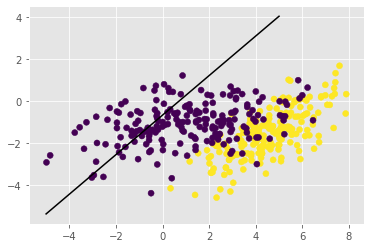

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, model_type="lin_reg", max_epoch=100,
                      alpha=0.01, C=10, batch_size=10)
clf.fit(X, y)
plot_decision_boundary(clf)
plt.scatter(X[:,0], X[:,1], c=y)

In [11]:
clf.weights

array([-0.09981842,  0.14109804, -0.15043927])

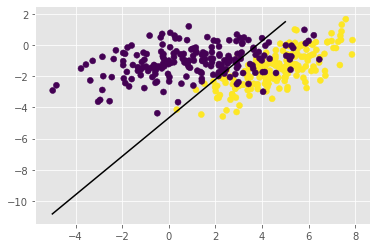

In [12]:
clf = MySGDClassifier(batch_generator, model_type="log_reg",
                      max_epoch=100, alpha=0.01, C=100, batch_size=10)
clf.fit(X, y)
plot_decision_boundary(clf)
plt.scatter(X[:,0], X[:,1], c=y)

In [13]:
clf.weights

array([-2.57237998,  0.68064895, -0.55117192])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [14]:
from sklearn.datasets import make_classification

In [15]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

In [16]:
X.shape

(100000, 10)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

100%|██████████| 5/5 [01:55<00:00, 22.98s/it]


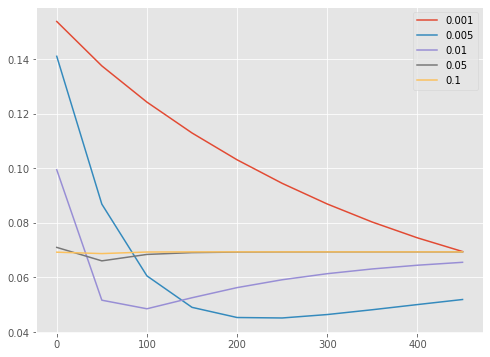

In [17]:
from tqdm import tqdm
# batch_size=X.shape[0] -> градиентный спуск
N = 50
alpha = [0.001, 0.005, 0.01, 0.05, 0.1]
fig, ax = plt.subplots(figsize=(8, 6))
for i in tqdm(range(len(alpha))):
    my_clf = MySGDClassifier(batch_generator, model_type='lin_reg', 
                             max_epoch=N * 10, alpha=alpha[i], 
                             C=10, batch_size=X.shape[0])
    my_clf.fit(X, y)
    loss = np.array([np.mean(my_clf.errors_log['loss'][i * N:(i + 1) * N])
                     for i in range(10)])
    steps = np.arange(0, 500, 50)
    ax.plot(steps, loss, label="{}".format(alpha[i]))
ax.legend()

100%|██████████| 5/5 [02:28<00:00, 29.96s/it]


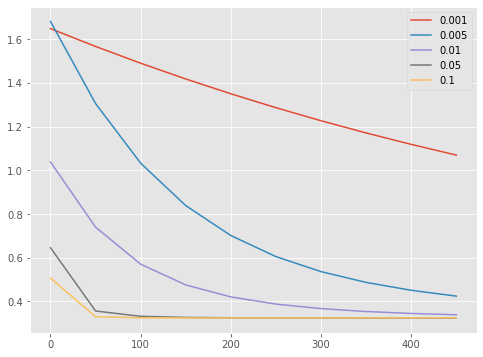

In [18]:
# batch_size=X.shape[0] -> градиентный спуск
N = 50
alpha = [0.001, 0.005, 0.01, 0.05, 0.1]
fig, ax = plt.subplots(figsize=(8, 6))
for i in tqdm(range(len(alpha))):
    my_clf = MySGDClassifier(batch_generator, model_type='log_reg',
                             max_epoch=N * 10, alpha=alpha[i],
                             C=10, batch_size=X.shape[0])
    my_clf.fit(X, y)
    loss = np.array([np.mean(my_clf.errors_log['loss'][i * N:(i + 1) * N])
                     for i in range(10)])
    steps = np.arange(0, 500, 50)
    ax.plot(steps, loss, label="{}".format(alpha[i]))
ax.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: overflow encountered in multiply


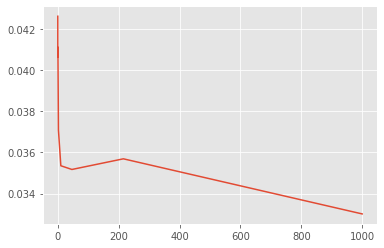

In [19]:
## Your Code Here
C = np.logspace(3, -3, 10)
w = []
for i in C:
    my_clf = MySGDClassifier(batch_generator, model_type="lin_reg", max_epoch=10,
                      alpha=0.01, C=i, batch_size=10)
    my_clf.fit(X, y)
    w.append(np.mean(my_clf.weights))
plt.plot(C, w)

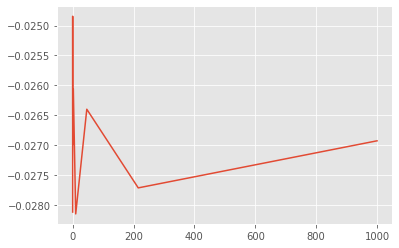

In [20]:
## Your Code Here
C = np.logspace(3, -3, 10)
w = []
for i in C:
    my_clf = MySGDClassifier(batch_generator, model_type="log_reg",
                      max_epoch=10, alpha=0.01, C=100, batch_size=10)
    my_clf.fit(X, y)
    w.append(np.mean(my_clf.weights))
plt.plot(C, w)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [21]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [22]:
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [23]:
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [24]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [26]:
batch_sizes = [5, 10, 50, 100, 500, 1000]
for batch_size in tqdm(batch_sizes):
    clf = MySGDClassifier(batch_generator, batch_size=batch_size,
                          model_type="lin_reg", max_epoch=100, C=10, alpha=0.01)
    clf.fit(X_train, y_train)

100%|██████████| 6/6 [01:49<00:00, 14.93s/it]


Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [27]:
# для подбора порога используется roc auc 
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
def cross_val_score(clf, kf, X, y):
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(roc_auc_score(y_test, y_pred))
    return np.mean(scores)

In [28]:
from itertools import product
res_score = 0
res_model = None
params = product(
    ("lin_reg", "log_reg"),
    (0.1, 0.01, 0.0001),
    (0.1, 1, 10),
    (10, 20))
for model_type, alpha, C, max_epoch in list(params):
    clf = MySGDClassifier(batch_generator, batch_size=1000, model_type=model_type,
        max_epoch=max_epoch, C=C, alpha=alpha)
    print(clf)
    score = np.mean(
        cross_val_score(clf=clf, kf=KFold(n_splits=3), X=X_train, y=y_train))
    print(score)
    if score > res_score:
        res_score = score
        res_model = clf
res_model

MySGDClassifier(C=0.1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='lin_reg')
0.8012616521467167
MySGDClassifier(C=0.1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='lin_reg')
0.8012366544840352
MySGDClassifier(C=1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='lin_reg')
0.8012462044796269
MySGDClassifier(C=1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='lin_reg')
0.8011808653129696
MySGDClassifier(C=10, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='lin_reg')
0.8011544689118555
MySGD

/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launch

0.7992379080670308
MySGDClassifier(C=0.1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.7939164544998984
MySGDClassifier(C=1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')
0.8012953902195946
MySGDClassifier(C=1, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


0.8013374971983875
MySGDClassifier(C=10, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')
0.8010597143844594
MySGDClassifier(C=10, alpha=0.1,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.8015441012485159
MySGDClassifier(C=0.1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')
0.8012874641354335
MySGDClassifier(C=0.1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')
0.8012892873903689
MySGDClassifier(C=1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.8011959105834477
MySGDClassifier(C=1, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


0.801243694909687
MySGDClassifier(C=10, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')
0.8001857634076798
MySGDClassifier(C=10, alpha=0.01,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


0.799562667852475
MySGDClassifier(C=0.1, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launch

0.8011559211463749
MySGDClassifier(C=0.1, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


0.8015508913237442
MySGDClassifier(C=1, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.801984731225411
MySGDClassifier(C=1, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.8017593170754632
MySGDClassifier(C=10, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.8019206410727131
MySGDClassifier(C=10, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=20, model_type='log_reg')


/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


0.8017710228674485


MySGDClassifier(C=1, alpha=0.0001,
                batch_generator=<function batch_generator at 0x7f4c105668c8>,
                batch_size=1000, max_epoch=10, model_type='log_reg')

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [29]:
def cross_val_score(clf, kf, X, y, th):
    scores = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(f1_score(y_test, y_pred >= th))
    return np.mean(scores)

In [30]:
# в соревновании оптимизируем f-меру
max_score = 0
res_th = 0
for threshold in np.linspace(0.0, 1.0, 100):
    score = cross_val_score(clf=res_model, kf=KFold(n_splits=3), X=X_train, y=y_train, th=threshold)
    if score > max_score:
        max_score = score
        res_th = threshold
res_th 

/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
/home/nastyboget/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
/home/nastyboget/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.7272727272727273

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [31]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [32]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [33]:
X_test = scaler.transform(X_test)

In [34]:
y_test = np.asarray(res_model.predict(X_test) > res_th, dtype=int)
test_data["target"] = pd.Series(y_test)
with open("result.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

Не до конца понятен ответ на вопрос про $w_0$. 
Также не до конца ясно, почему градиентный спуск работает??

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

Домашние работы показались очень сложными, хотелось бы,
чтобы на занятиях больше рассказывали про функции scikit learn и про их аргументы,
а задания формулировались конкретнее (может проблема не в заданиях, а во мне).
Баллы за домашнюю работу несравнимы со временем, которое на нее затрачивалось. 
В курсе особенно сложной показалась тема про SVM. 
Огромное спасибо Всеволоду за тепреливые ответы на вопросы. Многие вопросы стыдно задавать, 
потому что возможно эти вопросы покажутся глупыми отвечающему.